In [1]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
import os
from matplotlib.collections import LineCollection

os.getcwd()

'/Users/swyant/cesmix/exploratory/new_public/lammps_related/lammps_jl_tests/md_loops/clean_AL_prototype/plots'

In [3]:
num_iters = 4

steps_list =[]
temps_list = []
estds_list = []
energies_list = []
for i in range(num_iters):
    data = np.loadtxt(f"iteration{i+1}_data_ext.csv",delimiter=",",skiprows=1)
    steps      = data[:,0]
    temps      = data[:,1]
    energies   = data[:,2]
    energy_std = data[:,3]

    steps_list.append(steps)
    temps_list.append(temps)
    energies_list.append(energies)
    estds_list.append(energy_std)


3068.135730455411


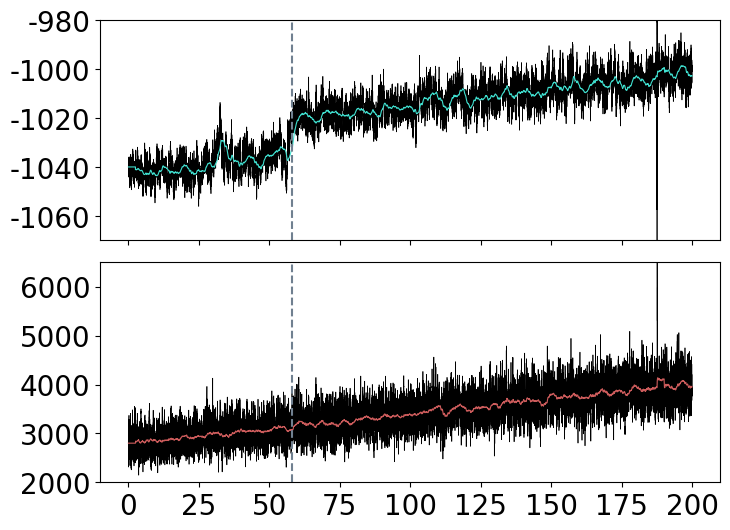

In [51]:
iter_idx = 3
window = 2500
melt_step = 58000
fig, axs = plt.subplots(2,1,sharex=True,figsize=(8,6),gridspec_kw={"hspace":0.10})
axs[0].plot(steps_list[iter_idx],energies_list[iter_idx],lw=0.5,color="k")
window_avg_e = np.convolve(energies_list[iter_idx], np.ones((window,))/window,mode="valid")
num_pad_steps = len(steps_list[iter_idx]) - len(window_avg_e)
pad_array = np.full((num_pad_steps),-1040)
window_avg_e = np.insert(window_avg_e,0,pad_array)
axs[0].plot(steps_list[iter_idx],window_avg_e,lw=0.8,color="turquoise")

axs[0].set_yticks([-1060,-1040,-1020,-1000,-980])
axs[0].set_yticklabels([-1060,-1040,-1020,-1000,-980])
axs[0].tick_params(axis="both", labelsize=20)

axs[0].axvline(melt_step,linestyle="--",color="slategrey")

axs[1].plot(steps_list[iter_idx],temps_list[iter_idx],lw=0.5,color="k")
window_avg= np.convolve(temps_list[iter_idx], np.ones((window,))/window, mode="valid")
num_pad_steps = len(steps_list[iter_idx]) - len(window_avg)
pad_array = np.full((num_pad_steps),2800)
window_avg = np.insert(window_avg, 0,pad_array)
axs[1].plot(steps_list[iter_idx],window_avg,lw=0.8,color="indianred")

axs[1].set_yticks([2000,3000,4000,5000,6000])
axs[1].set_yticklabels([2000,3000,4000,5000,6000])
axs[1].tick_params(axis="both", labelsize=20)

axs[1].axvline(melt_step,linestyle="--",color="slategrey")
print(window_avg[melt_step])

axs[0].set_ylim([-1070,-980])
axs[1].set_ylim([2000,6500])

axs[1].set_xticks([0,25000,50000,75000,100000,125000,150000,175000,200000])
axs[1].set_xticklabels([0,25,50,75,100,125,150,175,200])

plt.savefig("energy_temp_plot.png",dpi=1000)